In [1]:
import pandas as pd
import time
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import prediction_error


df = pd.read_excel('Dados de 2021 - Coletados em 17-06-2024 - REV02.xlsx')
df

,Posição,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,...,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água,Código do Município,Ano de Referência,Prestadores,Serviços,Natureza Jurídica
0,3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,...,8386.51,7.42,99.97,8.0,89.8,270030,2021,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
1,3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,...,1509.74,7.03,96.25,12.8,218.4,270060,2021,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
2,2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,...,291.05,6.14,99.86,15.8,74.3,291992,2021,[29274000] Empresa Baiana de Águas e Saneament...,Água e Esgoto,Sociedade de economia mista com administração ...
3,232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,...,81.55,6.70,99.87,25.5,75.5,320530,2021,[32053000] Companhia Espírito-Santense de Sane...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
4,1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,...,1562.00,1.79,93.03,10.1,215.2,270130,2021,[27013011] Serviço Autônomo de Água e Esgoto -...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,...,123.00,3.64,98.69,22.7,173.0,172097,2021,[17095000] Hidro Forte Administração e Operaçã...,Água e Esgoto | Res. Sólidos,Empresa privada | Administração pública direta
3992,3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,...,975.85,5.74,100.00,15.7,125.5,172120,2021,[17210000] Companhia de Saneamento do Tocantin...,Água e Esgoto | Res. Sólidos,Empresa privada | Administração pública direta
3993,3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,...,74.30,5.89,100.00,10.4,109.0,172125,2021,[17210001] Agência Tocantinense de Saneamento ...,Água | Res. Sólidos,Autarquia | Administração pública direta
3994,2731,1722081,Wanderlândia,TO,37.43,11783,15566.87,2859,42.22,428.29,...,266.11,5.12,100.00,13.6,94.2,172208,2021,[17210000] Companhia de Saneamento do Tocantin...,Água | Res. Sólidos,Empresa privada | Administração pública direta


# Filtrando Data Frame

In [2]:
indices_colunas = list(range(16))

df_filtrado = df.iloc[:, indices_colunas]

df_filtrado

,Posição,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
0,3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
1,3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2,2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
3,232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
4,1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3992,3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3993,3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0
3994,2731,1722081,Wanderlândia,TO,37.43,11783,15566.87,2859,42.22,428.29,266.11,266.11,5.12,100.00,13.6,94.2


In [3]:
df_filtrado.set_index(df_filtrado.columns[0], inplace=True)
df_filtrado

,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,,
3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [4]:
df_filtrado = df_filtrado.drop(df_filtrado.columns[0], axis=1)
df_filtrado

,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,
3963,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [5]:
col_perdas = df_filtrado.columns[2]   

new_column_order = [col_perdas] + [col for i, col in enumerate(df_filtrado.columns) if i != 2]

df_filtrado = df_filtrado[new_column_order]

df_filtrado

,IN049_AE - Índice de perdas na distribuição,Município,Estado,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,
3963,55.56,Arapiraca,AL,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,43.23,Barra de São Miguel,AL,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,37.25,Batalha,AL,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,17.39,Cacimbinhas,AL,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,27.20,Cajueiro,AL,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,27.47,Talismã,TO,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,41.22,Tocantinópolis,TO,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,51.30,Tupirama,TO,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [6]:
df_filtrado.isnull().sum()

IN049_AE - Índice de perdas na distribuição        0
Município                                          0
Estado                                             0
POP_TOT - População total do município             0
PIB - Produto Interno Bruto per capita             0
AG003 - Quantidade de economias ativas de água     0
AG005 - Extensão da rede de água                   0
AG006 - Volume de água produzido                   0
AG008 - Volume de água micromedido                 0
AG010 - Volume de água consumido                   0
IN005_AE - Tarifa média de água                    0
IN009_AE - Índice de hidrometração                 0
IN020_AE - Extensão da rede de água por ligação    0
IN022_AE - Consumo médio per capita de água        0
dtype: int64

In [7]:
df_filtrado.describe()

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
count,3996.000000,3.996000e+03,3996.000000,3.996000e+03,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,32.245881,4.327042e+04,34688.945050,1.521745e+04,157.029302,2645.643621,1872.176351,2181.519307,5.472237,93.658951,16.072022,138.359585
std,10.632080,2.559021e+05,38381.773896,1.032719e+05,570.761314,11614.672869,14080.729256,15726.425293,4.455704,19.167864,14.976893,54.940261
min,14.750000,7.710000e+02,6729.140000,5.800000e+01,1.000000,0.000000,0.000000,0.780000,0.040000,0.000000,2.900000,4.700000
25%,23.637500,5.922500e+03,13594.522500,1.521250e+03,23.000000,223.015000,138.987500,165.342500,3.940000,98.650000,9.700000,104.375000
50%,30.765000,1.248750e+04,25233.015000,3.197500e+03,49.080000,500.190000,324.545000,363.025000,5.070000,100.000000,12.900000,131.050000
75%,39.830000,2.715800e+04,42788.525000,7.886000e+03,120.000000,1368.070000,869.595000,994.255000,6.190000,100.000000,17.925000,158.400000
max,56.550000,1.239637e+07,610779.650000,5.111861e+06,23195.260000,260038.760000,728151.330000,729299.660000,151.790000,100.000000,197.200000,599.200000


# Data Frame com valores numéricos

In [8]:
df_filtrado_numerico = df_filtrado.select_dtypes(include=[int, float])
df_filtrado_numerico

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,
3963,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


# <font color='red' style='font-size: 30px;'>Separando dados em Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [9]:
y = df_filtrado_numerico['IN049_AE - Índice de perdas na distribuição']
y

Posição
3963    55.56
3286    43.23
2708    37.25
232     17.39
1505    27.20
        ...  
1539    27.47
3154    41.22
3771    51.30
2731    37.43
1452    26.81
Name: IN049_AE - Índice de perdas na distribuição, Length: 3996, dtype: float64

In [10]:
X = df_filtrado_numerico.drop('IN049_AE - Índice de perdas na distribuição', axis=1)
X.head()

,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,
3963,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# <font color='red' style='font-size: 30px;'>Aplicando Boosting</font>
<hr style='border: 2px solid red;'>

In [12]:
%%time

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4),
        'Erro Percentual Absoluto Médio (MAPE)': round(mape, 4)
    }

    return metricas

# cv = KFold(n_splits=5, shuffle=True, random_state=0)

# model_gbm = GradientBoostingRegressor(random_state=0)

# # grid_search = GridSearchCV(estimator=model_gbm, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=2)

# # grid_search.fit(X_train, y_train)

# print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# best_model = grid_search.best_estimator_

# scoring = {
#     'rmse': make_scorer(mean_squared_error, squared=False),
#     'mae': make_scorer(mean_absolute_error),
#     'r2': make_scorer(r2_score)
# }

# cv_results = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)

# metricas_cv = {
#     'Raiz do Erro Quadrático Médio': round(cv_results['test_rmse'].mean(), 3),
#     'Erro Absoluto Médio': round(cv_results['test_mae'].mean(), 3),
#     'R2 Score': round(cv_results['test_r2'].mean(), 3)
# }

# print("Métricas na validação cruzada:\n", metricas_cv)

# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)

# metricas_teste = calcular_metricas_regressao(y_test, y_pred)
# print("Métricas no conjunto de teste:\n", metricas_teste)



CPU times: total: 46.9 ms
Wall time: 37.9 ms


In [13]:
# visualizer = prediction_error(best_model, X_train, y_train, X_test, y_test)


# Modelo setado manualmente

In [14]:
%%time

model_gbm = GradientBoostingRegressor(learning_rate = 0.12, max_depth = 4, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 750)

model_gbm.fit(X_train, y_train)

y_pred = model_gbm.predict(X_test)


CPU times: total: 14 s
Wall time: 14.3 s


In [15]:
calcular_metricas_regressao(y_test, y_pred)

{'Raiz do Erro Quadrático Médio': 5.5581,
 'Erro Absoluto Médio': 3.83,
 'R2 Score': 0.7178,
 'Erro Percentual Absoluto Médio (MAPE)': np.float64(13.1061)}

C:\Users\Joao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


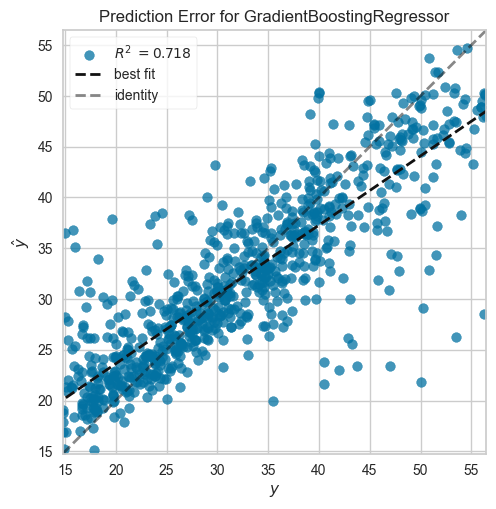

In [16]:
visualizer = prediction_error(model_gbm, X_train, y_train, X_test, y_test)

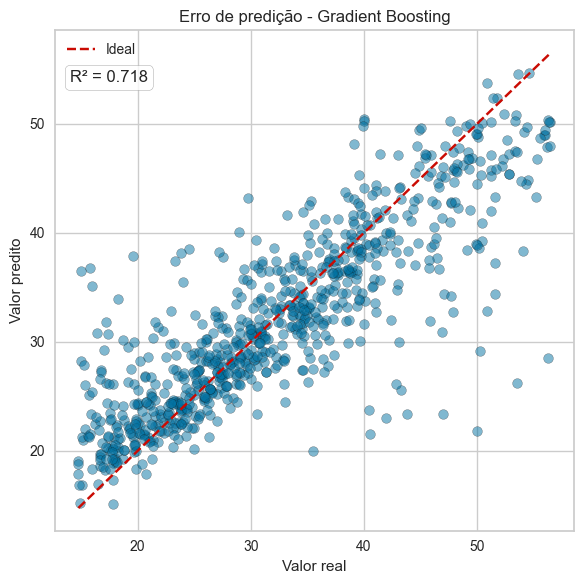

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Predição
y_pred = model_gbm.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Erro de predição - Gradient Boosting")
plt.legend()
plt.grid(True)

# R² no canto superior esquerdo
plt.text(
    0.03, 0.92,
    f"R² = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()


C:\Users\Joao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


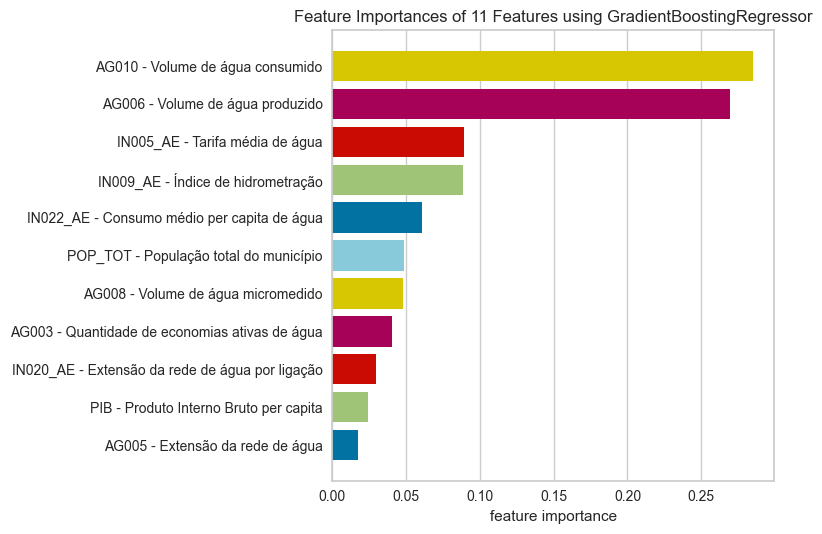

<Axes: title={'center': 'Feature Importances of 11 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [18]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_gbm, relative=False)
viz.fit(X_train, y_train)
viz.show()

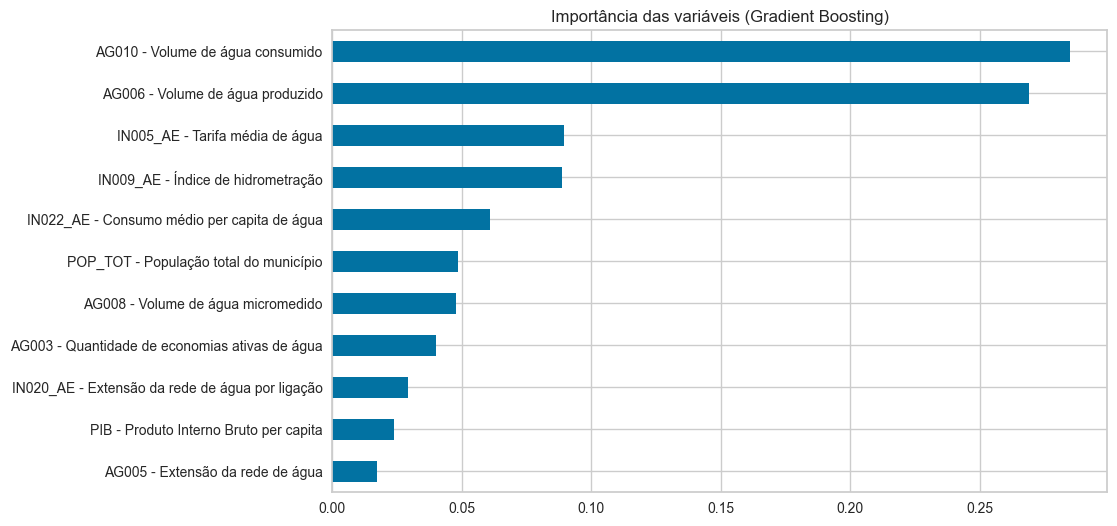

In [19]:
import matplotlib.pyplot as plt

# Importâncias
importances = model_gbm.feature_importances_
features = X_train.columns

# Plot manual
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Importância das variáveis (Gradient Boosting)")
plt.grid(True)
plt.show()

# <font color='red' style='font-size: 30px;'>Testando sem as variaveis com pouca significância</font>
<hr style='border: 2px solid red;'>

In [20]:
indices_para_remover = [2, 3, 4, 10]

df_filtrado_numerico_sig = df_filtrado_numerico.drop(df_filtrado_numerico.columns[indices_para_remover], axis=1)

df_filtrado_numerico_sig

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,
3963,55.56,234309,8669.05,7116.06,8386.51,7.42,99.97,89.8
3286,43.23,8434,1831.89,518.67,1509.74,7.03,96.25,218.4
2708,37.25,18440,0.00,290.46,291.05,6.14,99.86,74.3
232,17.39,10920,0.00,81.47,81.55,6.70,99.87,75.5
1505,27.20,21397,2145.50,1475.48,1562.00,1.79,93.03,215.2
...,...,...,...,...,...,...,...,...
1539,27.47,2831,169.58,91.27,123.00,3.64,98.69,173.0
3154,41.22,22820,1662.55,975.85,975.85,5.74,100.00,125.5
3771,51.30,1952,152.57,56.39,74.30,5.89,100.00,109.0


In [21]:
y = df_filtrado_numerico_sig['IN049_AE - Índice de perdas na distribuição']

X = df_filtrado_numerico_sig.drop('IN049_AE - Índice de perdas na distribuição', axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4),
        'Erro Percentual Absoluto Médio (MAPE)': round(mape, 4)
    }

    return metricas
    
# param_grid = {
#     'n_estimators': [600, 650, 700, 750, 800],
#     'learning_rate': [0.1, 0.15, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [4, 5, 6],
#     'min_samples_leaf': [1, 2, 3]
# }

# cv = KFold(n_splits=5, shuffle=True, random_state=0)

# model_gbm = GradientBoostingRegressor(random_state=0)

# grid_search = GridSearchCV(estimator=model_gbm, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# best_model = grid_search.best_estimator_

# scoring = {
#     'rmse': make_scorer(mean_squared_error, squared=False),
#     'mae': make_scorer(mean_absolute_error),
#     'r2': make_scorer(r2_score)
# }

# cv_results = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)

# metricas_cv = {
#     'Raiz do Erro Quadrático Médio': round(cv_results['test_rmse'].mean(), 3),
#     'Erro Absoluto Médio': round(cv_results['test_mae'].mean(), 3),
#     'R2 Score': round(cv_results['test_r2'].mean(), 3)
# }

# print("Métricas na validação cruzada:\n", metricas_cv)

# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)

# metricas_teste = calcular_metricas_regressao(y_test, y_pred)
# print("Métricas no conjunto de teste:\n", metricas_teste)


In [24]:
# visualizer = prediction_error(best_model, X_train, y_train, X_test, y_test)


# Modelo setado manualmente

In [25]:
%%time

model_gbm = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800)

model_gbm.fit(X_train, y_train)

y_pred = model_gbm.predict(X_test)


CPU times: total: 9.09 s
Wall time: 9.35 s


In [26]:
calcular_metricas_regressao(y_test, y_pred)


{'Raiz do Erro Quadrático Médio': 5.3827,
 'Erro Absoluto Médio': 3.4823,
 'R2 Score': 0.7353,
 'Erro Percentual Absoluto Médio (MAPE)': np.float64(11.9398)}

C:\Users\Joao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


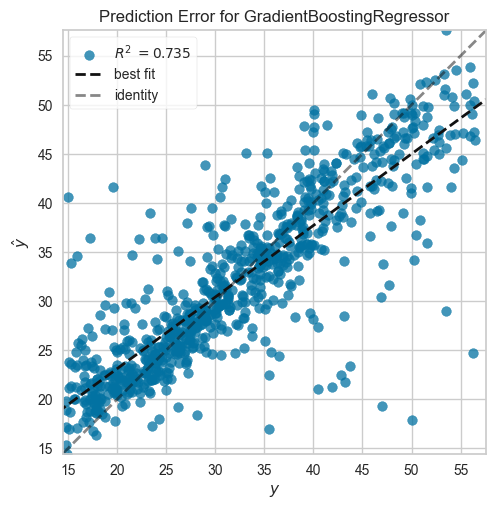

In [27]:
visualizer = prediction_error(model_gbm, X_train, y_train, X_test, y_test)


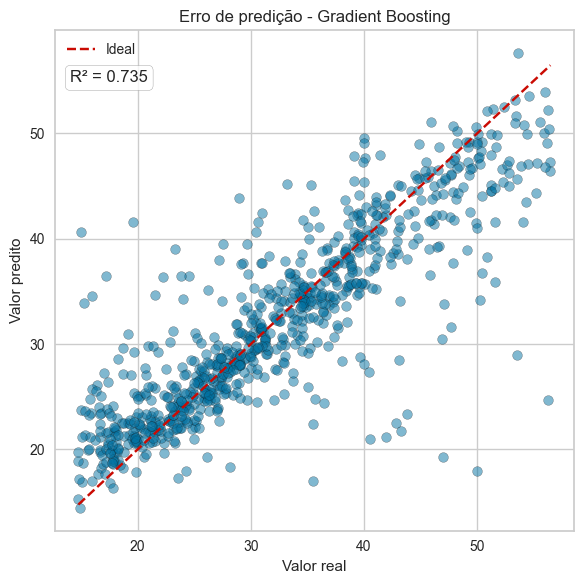

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Predição
y_pred = model_gbm.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Erro de predição - Gradient Boosting")
plt.legend()
plt.grid(True)

# R² no canto superior esquerdo
plt.text(
    0.03, 0.92,
    f"R² = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()


C:\Users\Joao\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


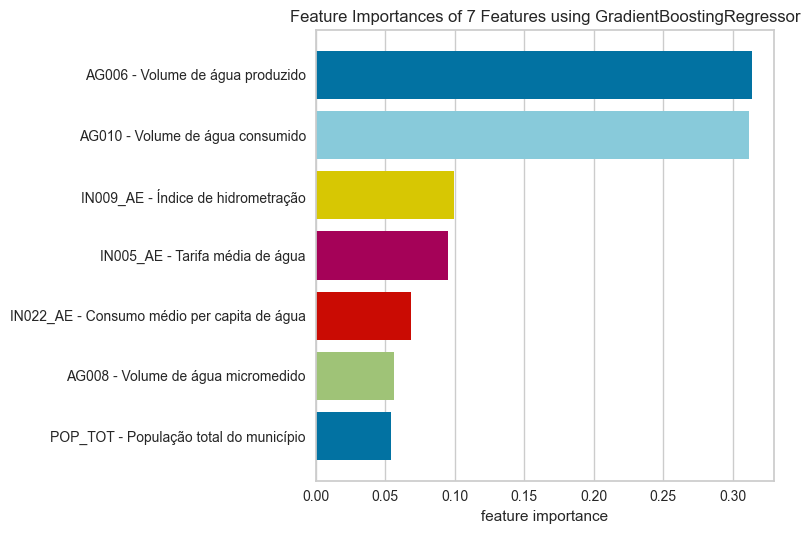

<Axes: title={'center': 'Feature Importances of 7 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [29]:
viz = FeatureImportances(model_gbm, relative=False)
viz.fit(X_train, y_train)
viz.show()

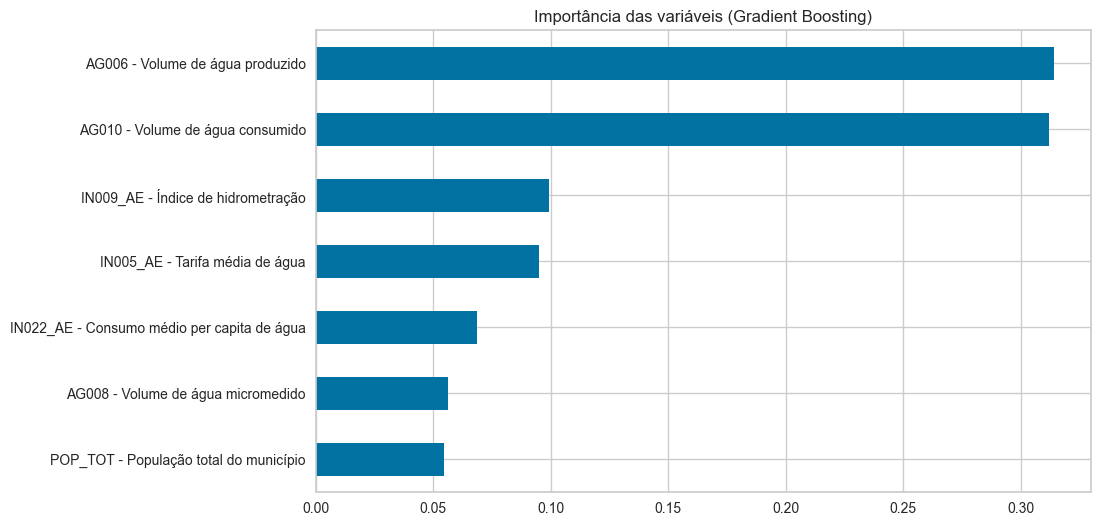

In [30]:
import matplotlib.pyplot as plt

# Importâncias
importances = model_gbm.feature_importances_
features = X_train.columns

# Plot manual
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Importância das variáveis (Gradient Boosting)")
plt.grid(True)
plt.show()